## Import

In [59]:
import pandas as pd                # 데이터 분석을 위해 pandas
import numpy as np                 # 수치계산을 위해 numpy
import matplotlib.pyplot as plt    # 시각화를 위해 mapplotlib, seaborn를 불러온다.
import seaborn as sns

In [60]:
# 한글 설정 & 마이너스 표시
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

## 데이터 가져오기 (data/housing_data.csv)

In [61]:
# CSV 파일 읽기
df = pd.read_csv('data/housing_data.csv', encoding='cp949')
df.head(7)

,행정구역별(시도),연령대,가구구분,2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7,2020.8,2020.9,2020.10,2020.11
0,행정구역별(시도),연령대,가구구분,가구-계,반려동물미보유가구-계,반려동물보유가구-계,단일-계,단일-개,단일-고양이,단일-기타,복합-계,복합-개+고양이,복합-개+기타,복합-고양이+기타,복합-개+고양이+기타
1,전국,계,계,20926710,17797748,3128962,2970999,2268514,571045,131440,157963,139644,11787,3060,3472
2,동부,계,계,16898553,14567149,2331404,2234509,1651735,471844,110930,96895,86821,5986,2482,1606
3,읍부,계,계,2022526,1679440,343086,322110,253849,55846,12415,20976,18411,1681,313,571
4,면부,계,계,2005631,1551159,454472,414380,362930,43355,8095,40092,34412,4120,265,1295
5,서울특별시,계,계,3982290,3484177,498113,479284,344419,110065,24800,18829,16740,1190,602,297
6,부산광역시,계,계,1405037,1220755,184282,176379,129190,39051,8138,7903,7182,434,201,86


## 데이터 전처리

### 0행의 값을 컬럼에 넣고 불필요한 행 제거

In [62]:
columns = df.iloc[0]

In [63]:
df.columns = columns

In [64]:
df = df.drop(df.index[0:5]).reset_index(drop=True)

In [65]:
df.head(2)

,행정구역별(시도),연령대,가구구분,가구-계,반려동물미보유가구-계,반려동물보유가구-계,단일-계,단일-개,단일-고양이,단일-기타,복합-계,복합-개+고양이,복합-개+기타,복합-고양이+기타,복합-개+고양이+기타
0,서울특별시,계,계,3982290,3484177,498113,479284,344419,110065,24800,18829,16740,1190,602,297
1,부산광역시,계,계,1405037,1220755,184282,176379,129190,39051,8138,7903,7182,434,201,86


### 불필요한 컬럼 제거

In [66]:
df = df.drop(df.columns[[1, 2, 3, 4, 6, 9, 11, 12, 13, 14]], axis=1)
df.head()

,행정구역별(시도),반려동물보유가구-계,단일-개,단일-고양이,복합-계
0,서울특별시,498113,344419,110065,18829
1,부산광역시,184282,129190,39051,7903
2,대구광역시,120096,86371,23450,4715
3,인천광역시,194387,143348,34515,8975
4,광주광역시,74499,52779,15487,3095


### 범례형 타입 -> 수치형 데이터로 변환

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   행정구역별(시도)   17 non-null     object
 1   반려동물보유가구-계  17 non-null     object
 2   단일-개        17 non-null     object
 3   단일-고양이      17 non-null     object
 4   복합-계        17 non-null     object
dtypes: object(5)
memory usage: 812.0+ bytes


In [68]:
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce') # errors='coerce' 변환할 수 없는값을 NaN으로

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   행정구역별(시도)   17 non-null     object
 1   반려동물보유가구-계  17 non-null     int64 
 2   단일-개        17 non-null     int64 
 3   단일-고양이      17 non-null     int64 
 4   복합-계        17 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 812.0+ bytes


### 컬럼이름 재설정

In [70]:
columns = ['행정구역', '보유가구', '개', '고양이', '복합']
df.columns = columns

In [71]:
df

,행정구역,보유가구,개,고양이,복합
0,서울특별시,498113,344419,110065,18829
1,부산광역시,184282,129190,39051,7903
2,대구광역시,120096,86371,23450,4715
3,인천광역시,194387,143348,34515,8975
4,광주광역시,74499,52779,15487,3095
5,대전광역시,80156,56910,16081,3118
6,울산광역시,59242,41040,12425,2851
7,세종특별자치시,18494,12641,3557,1152
8,경기도,862173,623960,157807,41995
9,강원도,113644,86273,16121,7723


In [72]:
# df = df.sort_values(by='행정구역')

In [73]:
# df2 = pd.read_csv('합칠꺼.csv', encoding='cp949')

In [74]:
# df2.drop(columns=['비율'], inplace=True)

In [75]:
# df2

In [76]:
# df['시설갯수'] = df2['시설갯수']

In [77]:
# df

## 시각화

### 행정구역별 반려동물 보유가구

In [78]:
index = np.arange(len(df))

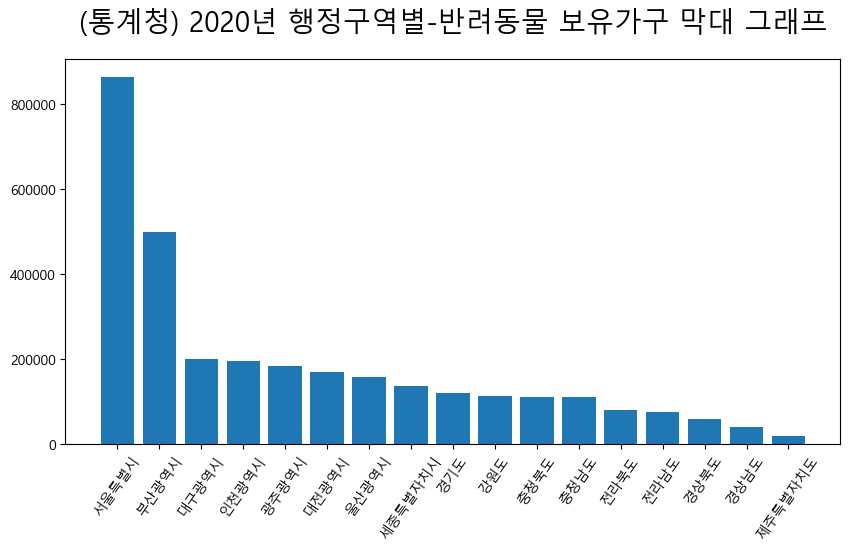

In [79]:
plt.figure(figsize=(10, 5))
plt.title('(통계청) 2020년 행정구역별-반려동물 보유가구 막대 그래프', fontsize=20, pad=20)
plt.bar(index, df['보유가구'].sort_values(ascending=False))
plt.xticks(index, df['행정구역'], rotation=55)
plt.show()

### 행정구역별 반려종 보유가구

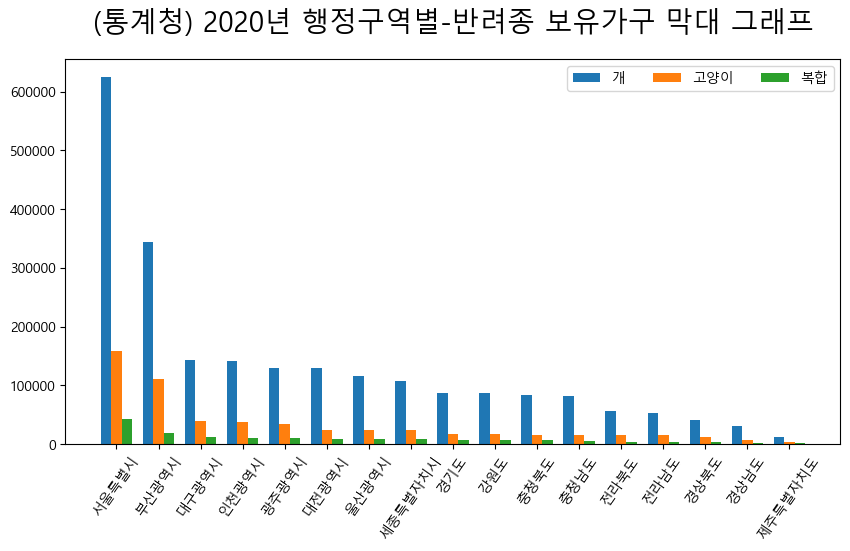

In [80]:
w = 0.25
plt.figure(figsize=(10, 5))
plt.title('(통계청) 2020년 행정구역별-반려종 보유가구 막대 그래프', fontsize=20, pad=20)

plt.bar(index - w, df['개'].sort_values(ascending=False), width=w, label='개')
plt.bar(index, df['고양이'].sort_values(ascending=False), width=w, label='고양이')
plt.bar(index + w, df['복합'].sort_values(ascending=False), width=w, label='복합')
plt.legend(ncol=3)
plt.xticks(index, df['행정구역'], rotation=55)
plt.show()

In [82]:
# w = 0.2  # 간격 조정

# plt.figure(figsize=(10, 5))
# plt.title('(통계청) 2020년 행정구역별-반려종 보유가구 막대 그래프', fontsize=20, pad=20)

# plt.bar(index - (1.5 * w), df['개'].sort_values(ascending=False), width=w, label='개')
# plt.bar(index - (0.5 * w), df['고양이'].sort_values(ascending=False), width=w, label='고양이')
# plt.bar(index + (0.5 * w), df['복합'].sort_values(ascending=False), width=w, label='복합')
# plt.bar(index + (1.5 * w), df['시설갯수'].sort_values(ascending=False), width=w, label='시설갯수')

# plt.legend(ncol=4)
# plt.xticks(index, df['행정구역'], rotation=55)
# plt.show()